In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import csv
import tensorflow as tf
import numpy as np
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

Put the hyparameters at the top like this to make it easier to change and edit.

In [ ]:
vocab_size = 5000 # frequently occuring 5000 words from the data (other ways :  word2vec,etc)
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

First, let's define two lists that containing articles and labels. In the meantime, we remove stopwords.

In [ ]:
articles = []
labels = []

with open("bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print(len(labels))
print(len(articles))

2225
2225


There are only 2,225 articles in the data. Then we split into training set and validation set, according to the parameter we set earlier, 80% for training, 20% for validation.

In [ ]:
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

1780
1780
1780
445
445


Tokenizer does all the heavy lifting for us. In our articles that it was tokenizing, it will take 5,000 most common words. oov_token is to put a special value in when an unseen word is encountered. This means I want "OOV" in bracket to be used to for words that are not in the word index. "fit_on_text" will go through all the text and create dictionary like this:

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index

You can see that "OOV" in bracket is number 1, "said" is number 2, "mr" is number 3, and so on.

In [ ]:
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'also': 6,
 'mr': 3,
 'new': 8,
 'one': 10,
 'people': 7,
 'said': 2,
 'us': 9,
 'would': 4,
 'year': 5}

This process cleans up our text, lowercase, and remove punctuations.

After tokenization, the next step is to turn thoes tokens into lists of sequence.

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_articles)

This is the 11th article in the training data that has been turned into sequences.

In [ ]:
print(train_sequences[10])

[2431, 1, 225, 4996, 22, 642, 587, 225, 4996, 1, 1, 1663, 1, 1, 2431, 22, 565, 1, 1, 140, 278, 1, 140, 278, 796, 823, 662, 2307, 1, 1145, 1694, 1, 1721, 4997, 1, 1, 1, 1, 1, 4738, 1, 1, 122, 4514, 1, 2, 2874, 1506, 352, 4739, 1, 52, 341, 1, 352, 2172, 3962, 41, 22, 3795, 1, 1, 1, 1, 543, 1, 1, 1, 835, 631, 2366, 347, 4740, 1, 365, 22, 1, 787, 2367, 1, 4301, 138, 10, 1, 3666, 682, 3532, 1, 22, 1, 414, 823, 662, 1, 90, 13, 633, 1, 225, 4996, 1, 599, 1, 1694, 1021, 1, 4998, 808, 1864, 117, 1, 1, 1, 2974, 22, 1, 99, 278, 1, 1607, 4999, 543, 492, 1, 1445, 4741, 778, 1320, 1, 1861, 10, 33, 642, 319, 1, 62, 478, 565, 301, 1507, 22, 479, 1, 1, 1666, 1, 797, 1, 3066, 1, 1365, 6, 1, 2431, 565, 22, 2971, 4735, 1, 1, 1, 1, 1, 850, 39, 1825, 675, 297, 26, 979, 1, 882, 22, 361, 22, 13, 301, 1507, 1343, 374, 20, 63, 883, 1096, 4302, 247]


When we train neural networks for NLP, we need sequences to be in the same size, that's why we use padding. Our max_length is 200, so we use pad_sequences to make all of our articles the same length which is 200 in my example. That's why you see that the 1st article was 426 in length, becomes 200, the 2nd article was 192 in length, becomes 200, and so on.

In [ ]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

425
200
192
200
186
200


In addtion, there is padding type and truncating type, there are all "post". Means for example, for the 11th article, it was 186 in length, we padded to 200, and we padded at the end, add 14 zeros.

In [ ]:
print(train_sequences[10])

[2431, 1, 225, 4996, 22, 642, 587, 225, 4996, 1, 1, 1663, 1, 1, 2431, 22, 565, 1, 1, 140, 278, 1, 140, 278, 796, 823, 662, 2307, 1, 1145, 1694, 1, 1721, 4997, 1, 1, 1, 1, 1, 4738, 1, 1, 122, 4514, 1, 2, 2874, 1506, 352, 4739, 1, 52, 341, 1, 352, 2172, 3962, 41, 22, 3795, 1, 1, 1, 1, 543, 1, 1, 1, 835, 631, 2366, 347, 4740, 1, 365, 22, 1, 787, 2367, 1, 4301, 138, 10, 1, 3666, 682, 3532, 1, 22, 1, 414, 823, 662, 1, 90, 13, 633, 1, 225, 4996, 1, 599, 1, 1694, 1021, 1, 4998, 808, 1864, 117, 1, 1, 1, 2974, 22, 1, 99, 278, 1, 1607, 4999, 543, 492, 1, 1445, 4741, 778, 1320, 1, 1861, 10, 33, 642, 319, 1, 62, 478, 565, 301, 1507, 22, 479, 1, 1, 1666, 1, 797, 1, 3066, 1, 1365, 6, 1, 2431, 565, 22, 2971, 4735, 1, 1, 1, 1, 1, 850, 39, 1825, 675, 297, 26, 979, 1, 882, 22, 361, 22, 13, 301, 1507, 1343, 374, 20, 63, 883, 1096, 4302, 247]


In [ ]:
print(train_padded[10])

[2431    1  225 4996   22  642  587  225 4996    1    1 1663    1    1
 2431   22  565    1    1  140  278    1  140  278  796  823  662 2307
    1 1145 1694    1 1721 4997    1    1    1    1    1 4738    1    1
  122 4514    1    2 2874 1506  352 4739    1   52  341    1  352 2172
 3962   41   22 3795    1    1    1    1  543    1    1    1  835  631
 2366  347 4740    1  365   22    1  787 2367    1 4301  138   10    1
 3666  682 3532    1   22    1  414  823  662    1   90   13  633    1
  225 4996    1  599    1 1694 1021    1 4998  808 1864  117    1    1
    1 2974   22    1   99  278    1 1607 4999  543  492    1 1445 4741
  778 1320    1 1861   10   33  642  319    1   62  478  565  301 1507
   22  479    1    1 1666    1  797    1 3066    1 1365    6    1 2431
  565   22 2971 4735    1    1    1    1    1  850   39 1825  675  297
   26  979    1  882   22  361   22   13  301 1507 1343  374   20   63
  883 1096 4302  247    0    0    0    0    0    0    0    0    0    0
    0 

And for the 1st article, it was 426 in length, we truncated to 200, and we truncated at the end.

In [ ]:
print(train_sequences[0])

[91, 160, 1142, 1107, 49, 979, 755, 1, 89, 1304, 4288, 129, 175, 3654, 1215, 1196, 1577, 42, 7, 893, 91, 1, 334, 85, 20, 14, 130, 3262, 1216, 2421, 570, 451, 1376, 58, 3379, 3522, 1661, 8, 921, 730, 10, 844, 1, 9, 598, 1578, 1108, 395, 1940, 1107, 731, 49, 538, 1398, 2012, 1622, 134, 249, 113, 2355, 795, 4981, 980, 584, 10, 3957, 3958, 921, 2562, 129, 344, 175, 3654, 1, 1, 39, 62, 2867, 28, 9, 4723, 18, 1305, 136, 416, 7, 143, 1423, 71, 4501, 436, 4982, 91, 1108, 77, 1, 82, 2013, 53, 1, 91, 6, 1008, 601, 89, 1304, 91, 1962, 131, 137, 420, 9, 2868, 38, 152, 1235, 89, 1304, 4724, 7, 436, 4982, 3153, 6, 2492, 1, 431, 1127, 1, 1424, 571, 1217, 1902, 1, 766, 9, 538, 1398, 2012, 134, 2070, 400, 845, 1963, 1600, 34, 1717, 2869, 1, 1, 2422, 244, 9, 2624, 82, 732, 6, 1173, 1197, 152, 720, 591, 1, 124, 28, 1305, 1690, 432, 83, 933, 115, 20, 14, 18, 3154, 1, 37, 1485, 1, 23, 37, 87, 335, 2356, 37, 467, 255, 1963, 1359, 328, 1, 299, 732, 1174, 18, 2870, 1717, 1, 294, 756, 1074, 395, 2014, 387, 431

In [ ]:
print(train_padded[0])

[  91  160 1142 1107   49  979  755    1   89 1304 4288  129  175 3654
 1215 1196 1577   42    7  893   91    1  334   85   20   14  130 3262
 1216 2421  570  451 1376   58 3379 3522 1661    8  921  730   10  844
    1    9  598 1578 1108  395 1940 1107  731   49  538 1398 2012 1622
  134  249  113 2355  795 4981  980  584   10 3957 3958  921 2562  129
  344  175 3654    1    1   39   62 2867   28    9 4723   18 1305  136
  416    7  143 1423   71 4501  436 4982   91 1108   77    1   82 2013
   53    1   91    6 1008  601   89 1304   91 1962  131  137  420    9
 2868   38  152 1235   89 1304 4724    7  436 4982 3153    6 2492    1
  431 1127    1 1424  571 1217 1902    1  766    9  538 1398 2012  134
 2070  400  845 1963 1600   34 1717 2869    1    1 2422  244    9 2624
   82  732    6 1173 1197  152  720  591    1  124   28 1305 1690  432
   83  933  115   20   14   18 3154    1   37 1485    1   23   37   87
  335 2356   37  467  255 1963 1359  328    1  299  732 1174   18 2870
 1717 

Then we do the same for the validation sequences. Note that we should expect more out of vocabulary words from validation articles because word index were derived from the training articles.

In [ ]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 200)


Now we are going to look at the labels. because our labels are text, so we will tokenize them, when training, labels are expected to be numpy arrays. So we will turn list of labels into numpy arrays like so:

In [ ]:
print(set(labels))

{'business', 'tech', 'sport', 'politics', 'entertainment'}


In [ ]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

In [ ]:
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


Before training deep neural network, we want to explore what our original article and article after padding look like. Running the following code, we explore the 11th article, we can see that some words become "OOV", because they did not make to the top 5,000.

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('---')
print(train_articles[10])

berlin <OOV> anti nazi film german movie anti nazi <OOV> <OOV> drawn <OOV> <OOV> berlin film festival <OOV> <OOV> final days <OOV> final days member white rose movement <OOV> 21 arrested <OOV> brother hans <OOV> <OOV> <OOV> <OOV> <OOV> tyranny <OOV> <OOV> director marc <OOV> said feeling responsibility keep legacy <OOV> going must <OOV> keep ideas alive added film drew <OOV> <OOV> <OOV> <OOV> trial <OOV> <OOV> <OOV> east germany secret police discovery <OOV> behind film <OOV> worked closely <OOV> relatives including one <OOV> sisters ensure historical <OOV> film <OOV> members white rose <OOV> group first started <OOV> anti nazi <OOV> summer <OOV> arrested dropped <OOV> munich university calling day <OOV> <OOV> <OOV> regime film <OOV> six days <OOV> arrest intense trial saw <OOV> initially deny charges ended <OOV> appearance one three german films <OOV> top prize festival south african film version <OOV> <OOV> opera <OOV> shot <OOV> town <OOV> language also <OOV> berlin festival film en

Now we can implement LSTM. Here is my code that I build a tf.keras.Sequential model and start with an embedding layer. An embedding layer stores one vector per word. When called, it converts the sequences of word indices into sequences of vectors. After training, words with similar meanings often have the similar vectors.

Next is how to implement LSTM in code. The Bidirectional wrapper is used with a LSTM layer, this propagates the input forwards and backwards through the LSTM layer and then concatenates the outputs. This helps LSTM to learn long term dependencies. We then fit it to a dense neural network to do classification.

This index-lookup is much more efficient than the equivalent operation of passing a one-hot encoded vector through a tf.keras.layers.Dense layer.

In [ ]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
#    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 6 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 394,694
Trainable params: 394,694
Non-trainable params: 0
_________________________________________________________________


In our model summay, we have our embeddings, our Bidirectional contains LSTM, followed by two dense layers. The output from Bidirectional is 128, because it doubled what we put in LSTM. We can also stack LSTM layer but I found the results worse.

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
num_epochs = 20
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/20
56/56 - 1s - loss: 7.0219e-06 - accuracy: 1.0000 - val_loss: 0.3138 - val_accuracy: 0.9528
Epoch 2/20
56/56 - 1s - loss: 6.5655e-06 - accuracy: 1.0000 - val_loss: 0.3161 - val_accuracy: 0.9528
Epoch 3/20
56/56 - 1s - loss: 6.1513e-06 - accuracy: 1.0000 - val_loss: 0.3184 - val_accuracy: 0.9528
Epoch 4/20
56/56 - 1s - loss: 5.7703e-06 - accuracy: 1.0000 - val_loss: 0.3208 - val_accuracy: 0.9506
Epoch 5/20
56/56 - 1s - loss: 5.4205e-06 - accuracy: 1.0000 - val_loss: 0.3229 - val_accuracy: 0.9528
Epoch 6/20
56/56 - 1s - loss: 5.1060e-06 - accuracy: 1.0000 - val_loss: 0.3251 - val_accuracy: 0.9528
Epoch 7/20
56/56 - 1s - loss: 4.8070e-06 - accuracy: 1.0000 - val_loss: 0.3272 - val_accuracy: 0.9528
Epoch 8/20
56/56 - 1s - loss: 4.5370e-06 - accuracy: 1.0000 - val_loss: 0.3291 - val_accuracy: 0.9528
Epoch 9/20
56/56 - 1s - loss: 4.2853e-06 - accuracy: 1.0000 - val_loss: 0.3312 - val_accuracy: 0.9528
Epoch 10/20
56/56 - 1s - loss: 4.0542e-06 - accuracy: 1.0000 - val_loss: 0.3340 - 

In [ ]:
!pip install matplotlib

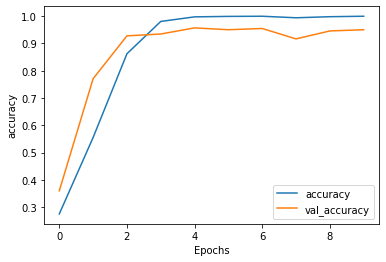

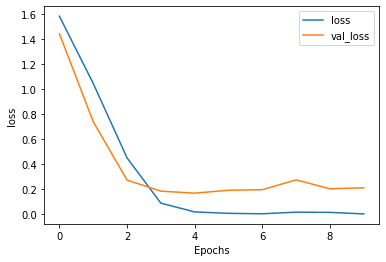

In [ ]:
from matplotlib import pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
txt = ["A WeWork shareholder has taken the company to court over the near-$1.7bn (£1.3bn) leaving package approved for ousted co-founder Adam Neumann."]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
pred

array([[2.8325338e-04, 2.1197850e-02, 1.4280945e-03, 6.9294806e-04,
        1.5313146e-03, 9.7486645e-01]], dtype=float32)

In [ ]:
txt = ["Ronaldo scores the goal"]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
labels = ['sport', 'bussiness', 'politics', 'tech', 'entertainment','unknown']
print(pred, labels[np.argmax(pred)])

[[2.2943839e-04 2.1576112e-02 1.4059686e-03 6.2222738e-04 1.3096083e-03
  9.7485662e-01]] unknown


In [ ]:
np.argmax(pred)

5